STUDENT PERFORMANCE INDICATOR

1. Problem Statement : 

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2. Data Collection : 

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977 

The data consists of 8 column and 1000 rows.

2.1 Importing Data and Req Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_csv("../Dataset/StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Shape of dataset 
data.shape

(1000, 8)

2.2 Dataset information

gender : sex of students -> (Male/female)

race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)

lunch : having lunch before test (standard or free/reduced)

test preparation course : complete or not complete before test

math score

reading score

writing score

3. Data Checks to perform

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

In [4]:
#3.1 Checking Missing Values

data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Here we can see that there are no missing values

In [5]:
# Checking Duplicates
data.duplicated().sum()

0

There are no duplicated values.

In [6]:
# Check DataType

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Checking the number of unique value in each col 
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
# Check statistics of data

data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

From above description of numerical data, all means are very close to each other - between 66 and 68.05;

All standard deviations are also close - between 14.6 and 15.19;

While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17


In [9]:
# Checking for categorical data 
print("Categories in 'gender' variable: ",end=" " )
print(data['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=" ")
print(data['race/ethnicity'].unique())

print("Categories in'parental level of education' variable: ",end=" " )
print(data['parental level of education'].unique())

print("Categories in 'lunch' variable: ",end=" " )
print(data['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" " )
print(data['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [10]:
# define numeric and categorical column 
numeric_feature  = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O']

#Printing cols
print('We have {} numerical features : {}'.format(len(numeric_feature), numeric_feature))
print('We have {} categorical features : {}'.format(len(categorical_feature), categorical_feature))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [11]:
# Adding total score and average 

data['Total_score']= data['reading score'] + data['math score'] + data['writing score']
data['Average'] = round(data['Total_score'] / 3, 2)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [12]:
math_full = data[data['math score'] == 100]['Average'].count()
reading_full = data[data['reading score'] == 100]['Average'].count()
writing_full = data[data['writing score'] == 100]['Average'].count()

print(f'No of student with full marks in Math : {math_full}')
print(f'No of student with full marks in Reading : {reading_full}')
print(f'No of student with full marks in Writing : {writing_full}')

No of student with full marks in Math : 7
No of student with full marks in Reading : 17
No of student with full marks in Writing : 14


In [13]:
math_less20 = data[data['math score'] <= 20]['Average'].count()
reading_less20 = data[data['reading score'] <= 20]['Average'].count()
writing_less20 = data[data['writing score'] <= 20]['Average'].count()

print(f'No of student with less than 20 marks in Math : {math_less20}')
print(f'No of student with less than 20 marks in Reading : {reading_less20}')
print(f'No of student with less than 20 marks in Writing : {writing_less20}')

No of student with less than 20 marks in Math : 4
No of student with less than 20 marks in Reading : 1
No of student with less than 20 marks in Writing : 3


Insights

From above values we get students have performed the worst in Maths.

Best performance is in reading section.

4. Exploring Data ( Visualization )


4.1 Visualize average score distribution to make some conclusion.

Histogram

Kernel Distribution Function (KDE)

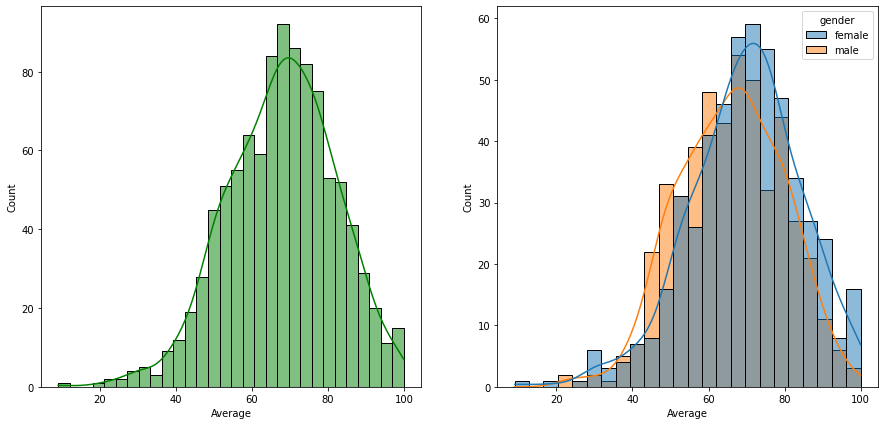

In [14]:
fig, axis = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=data,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='Average',kde=True,hue='gender')
plt.show()

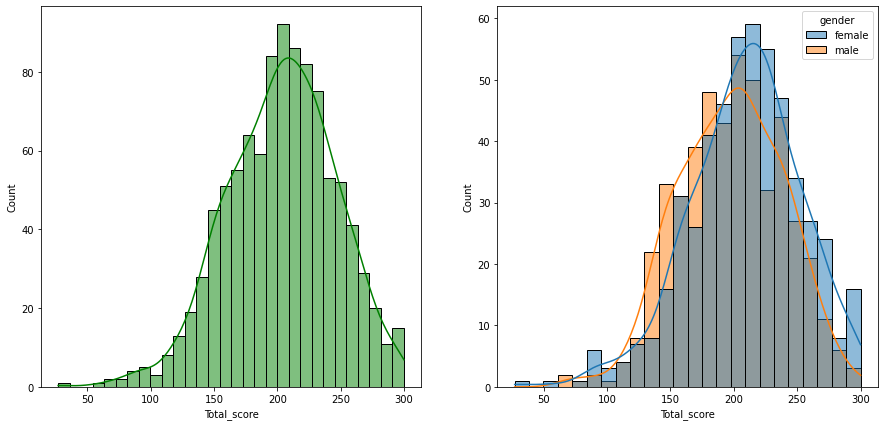

In [15]:
fig, axis = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=data,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='Total_score',kde=True,hue='gender')
plt.show()

Insights

Female students tend to perform well then male students.

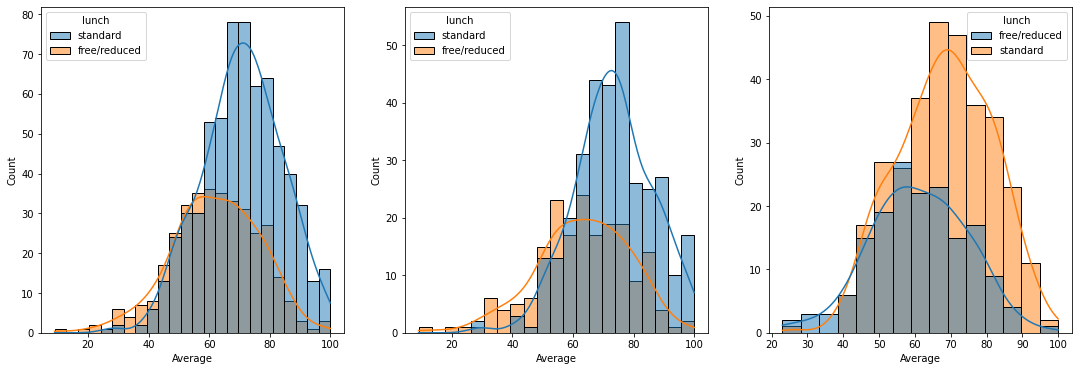

In [16]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = data, x = 'Average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = data[data.gender == 'female'], x = 'Average', kde = True, hue= 'lunch')
plt.subplot(143)
sns.histplot(data = data[data.gender == 'male'], x = 'Average', kde = True, hue = 'lunch')
plt.show()

Insights

Standard lunch helps perform well in exams.

Standard lunch helps perform well in exams be it a male or a female.

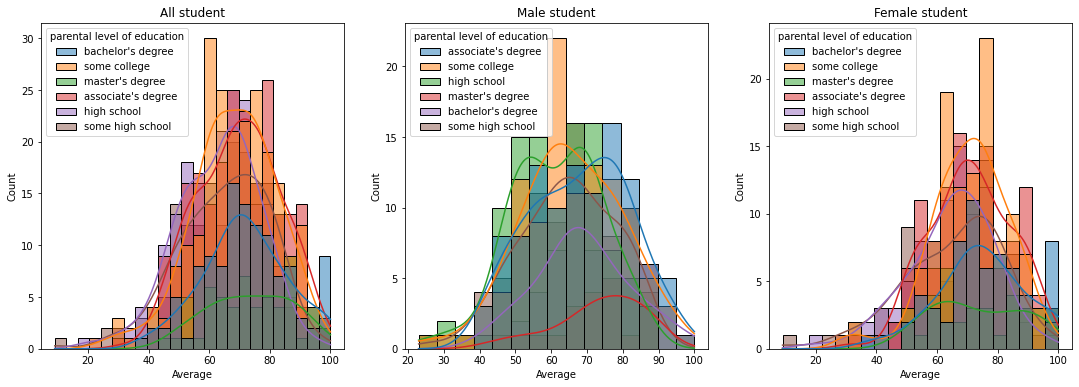

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
plt.title('All student')
ax =sns.histplot(data=data,x='Average',kde=True,hue='parental level of education')
plt.subplot(142)
plt.title('Male student')
ax =sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='parental level of education')
plt.subplot(143)
plt.title('Female student')
ax =sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='parental level of education')
plt.show()

Insights

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.

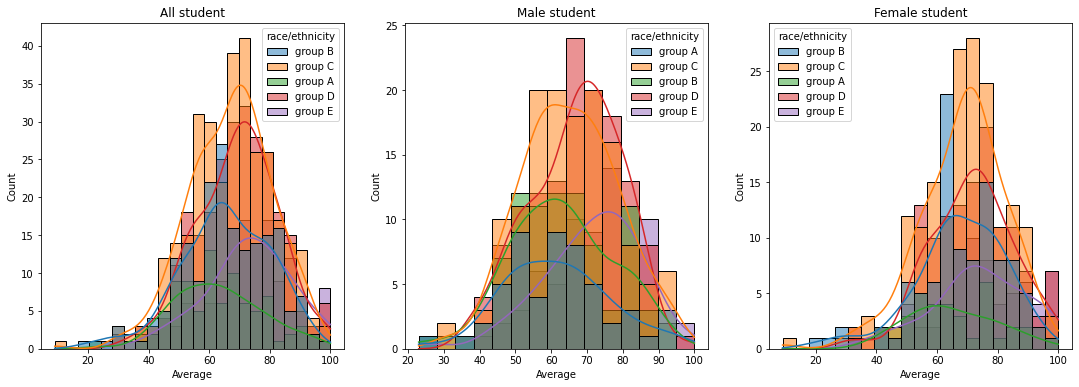

In [18]:
plt.subplots(1,3, figsize = (25, 6))
plt.subplot(141)
plt.title('All student')
ax = sns.histplot(data = data, x= 'Average', kde= True, hue= 'race/ethnicity')
plt.subplot(142)
plt.title('Male student')
ax = sns.histplot(data = data[data.gender == 'male'], x= 'Average', kde= True, hue= 'race/ethnicity')
plt.subplot(143)
plt.title('Female student')
ax = sns.histplot(data = data[data.gender == 'female'], x= 'Average', kde= True, hue= 'race/ethnicity')
plt.show()

Insights 

Students of Group A and B tends to perform purely in exam. 

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

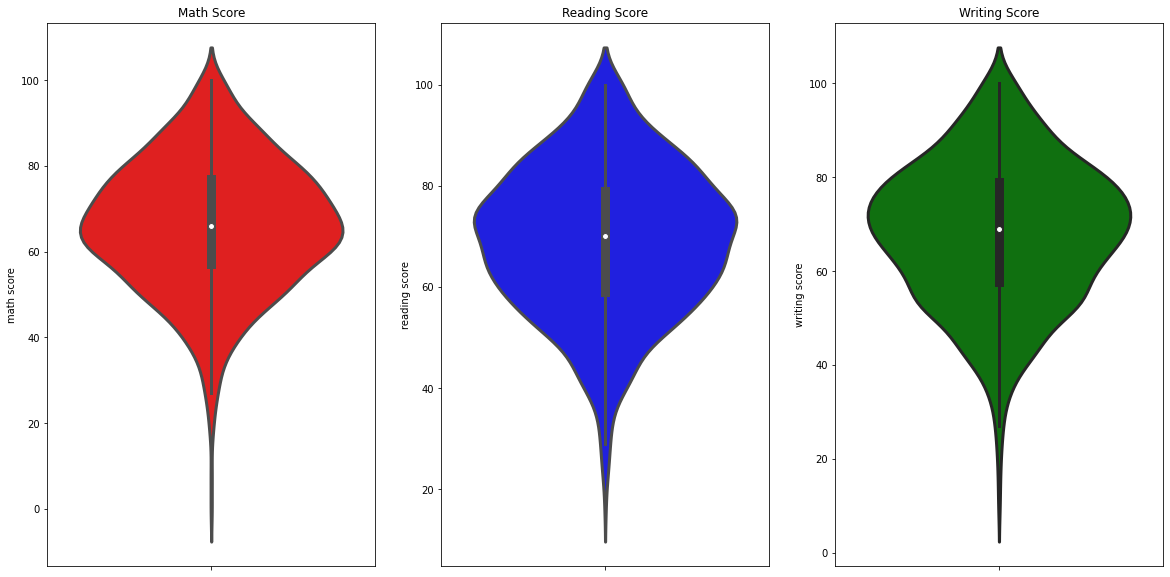

In [19]:
# Maximum score of student in all three exam 
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.title('Math Score')
sns.violinplot(data=data, y = 'math score', color = 'red', linewidth = 3)
plt.subplot(1, 3, 2)
plt.title('Reading Score')
sns.violinplot(data=data, y = 'reading score', color = 'blue', linewidth = 3)
plt.subplot(1, 3, 3)
plt.title('Writing Score')
sns.violinplot(data=data, y = 'writing score', color = 'green', linewidth = 3)
plt.show()

Insights

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

(-1.25, 1.25, -1.25, 1.25)

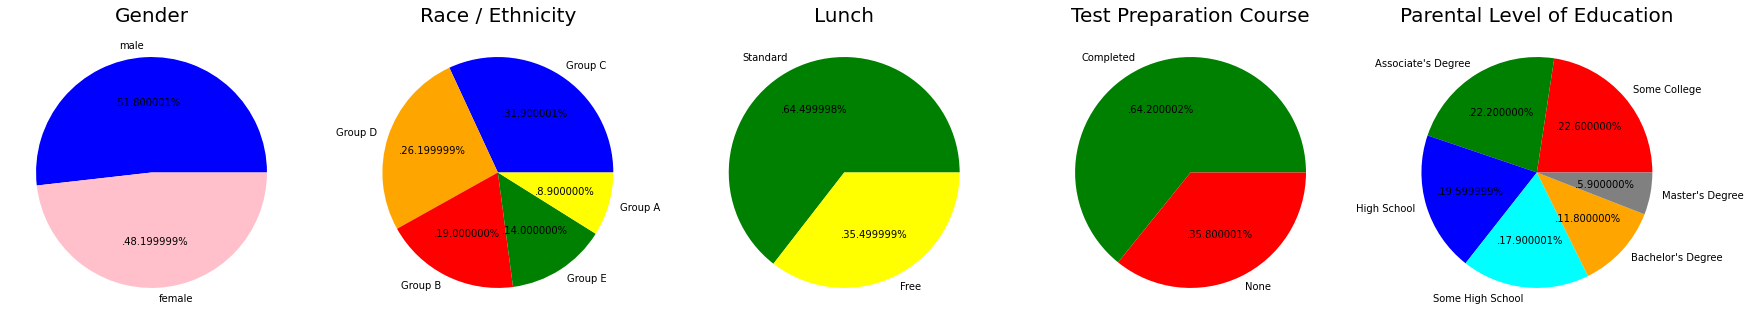

In [20]:
# Multivariate analysis using pieplot

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
color = ['blue', 'pink']
label = 'male', 'female'
plt.pie(size, colors=color, labels=label, autopct='.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = data['race/ethnicity'].value_counts()
color = ['blue', 'orange', 'red', 'green', 'yellow']
label = 'Group C', 'Group D','Group B','Group E','Group A'
plt.pie(size, colors=color, labels=label, autopct='.%2f%%')
plt.title('Race / Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
color = ['green', 'yellow']
label = 'Standard', 'Free'
plt.pie(size, colors=color, labels=label, autopct='.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = data['test preparation course'].value_counts()
color = ['green', 'red']
label = 'Completed', 'None'
plt.pie(size, colors=color, labels=label, autopct='.%2f%%')
plt.title('Test Preparation Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = data['parental level of education'].value_counts()
color = ['red', 'green', 'blue', 'cyan','orange','grey']
label = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
plt.pie(size, colors=color, labels=label, autopct='.%2f%%')
plt.title('Parental Level of Education', fontsize = 20)
plt.axis('off')

Insights


Number of Male and Female students is almost equal

Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

Feature Wise Visualization

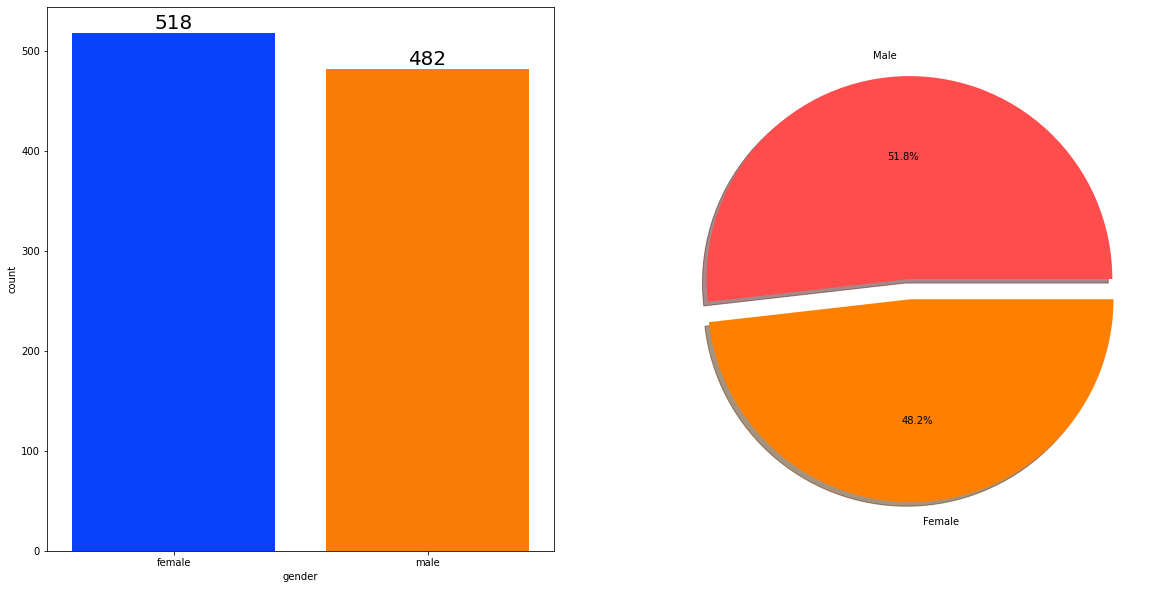

In [21]:
# Gendar Col.

# How is the distribution of gender

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [22]:
# Does gender have any impact on student performance ?

gender_group = data.groupby('gender').mean()
gender_group

,math score,reading score,writing score,Total_score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


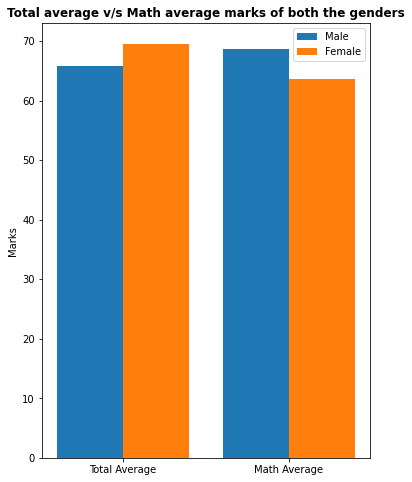

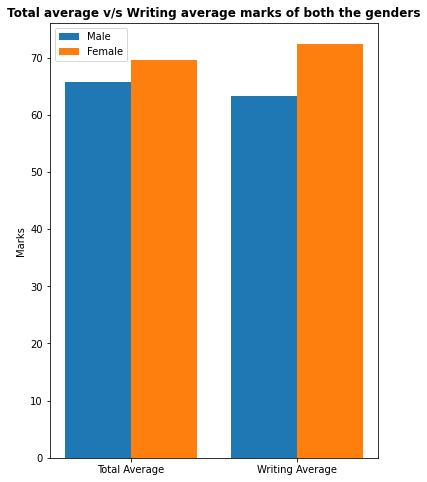

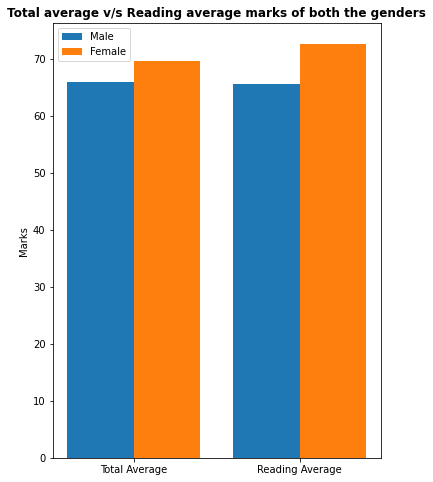

In [23]:
plt.rcParams['figure.figsize'] = (20,8)

plt.subplot(1, 3, 1)
X_m = ['Total Average','Math Average']


female_scores_m = [gender_group['Average'][0], gender_group['math score'][0]]
male_scores_m = [gender_group['Average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X_m))
  
plt.bar(X_axis - 0.2, male_scores_m, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores_m, 0.4, label = 'Female')

plt.xticks(X_axis, X_m)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

plt.subplot(1, 3, 2)
X = ['Total Average','Writing Average']

female_scores = [gender_group['Average'][0], gender_group['writing score'][0]]
male_scores = [gender_group['Average'][1], gender_group['writing score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Writing average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

plt.subplot(1, 3, 2)
X_r = ['Total Average','Reading Average']


female_scores_r = [gender_group['Average'][0], gender_group['reading score'][0]]
male_scores_r = [gender_group['Average'][1], gender_group['reading score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores_r, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores_r, 0.4, label = 'Female')

plt.xticks(X_axis, X_r)
plt.ylabel("Marks")
plt.title("Total average v/s Reading average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights

On an average females have a better overall score than men.

Males have scored higher in Maths.

Females have scored higher in Reading and Writing.



In [24]:
# Race / Ethnicity Col.

# How is the distribution of race

race_group = data.groupby('race/ethnicity').mean()
race_group

,math score,reading score,writing score,Total_score,Average
race/ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992135
group B,63.452632,67.352632,65.600000,196.405263,65.468579
group C,64.463950,69.103448,67.827586,201.394984,67.131567
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752000


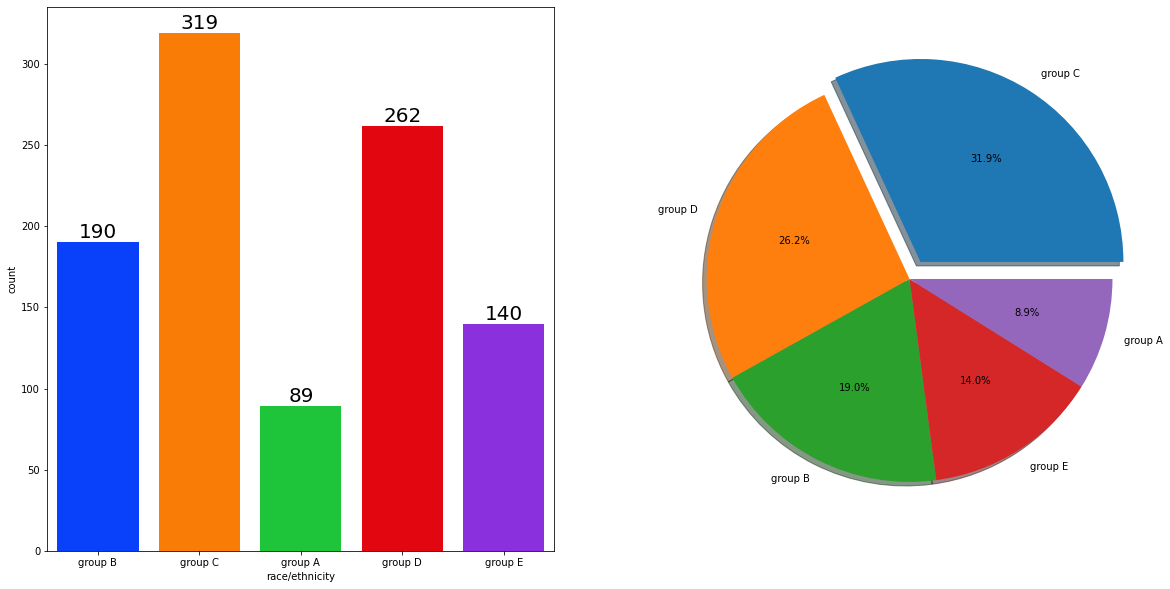

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['race/ethnicity'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = data['race/ethnicity'].value_counts(),labels=data['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

Insights

Group C has more number of students while Group A has least

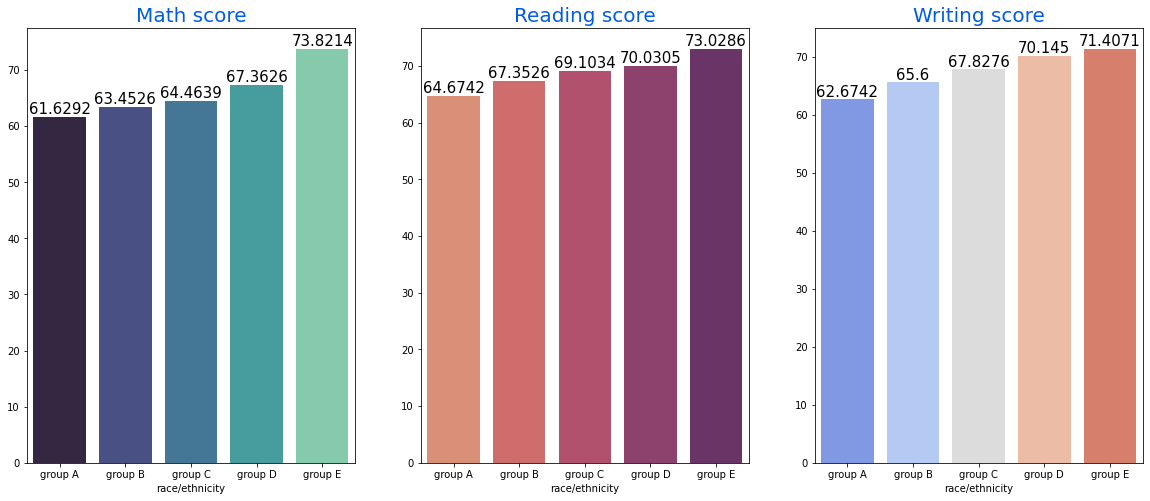

In [26]:
# Performance based on Group 

Group_data2=data.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

In [27]:
# Parental Level of Ed

# How is the distribution of Parental Level

parental_group = data.groupby('parental level of education').mean()
parental_group

,math score,reading score,writing score,Total_score,Average
parental level of education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.568964
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923983
high school,62.137755,64.704082,62.448980,189.290816,63.097194
master's degree,69.745763,75.372881,75.677966,220.796610,73.598644
some college,67.128319,69.460177,68.840708,205.429204,68.476106
some high school,63.497207,66.938547,64.888268,195.324022,65.107654


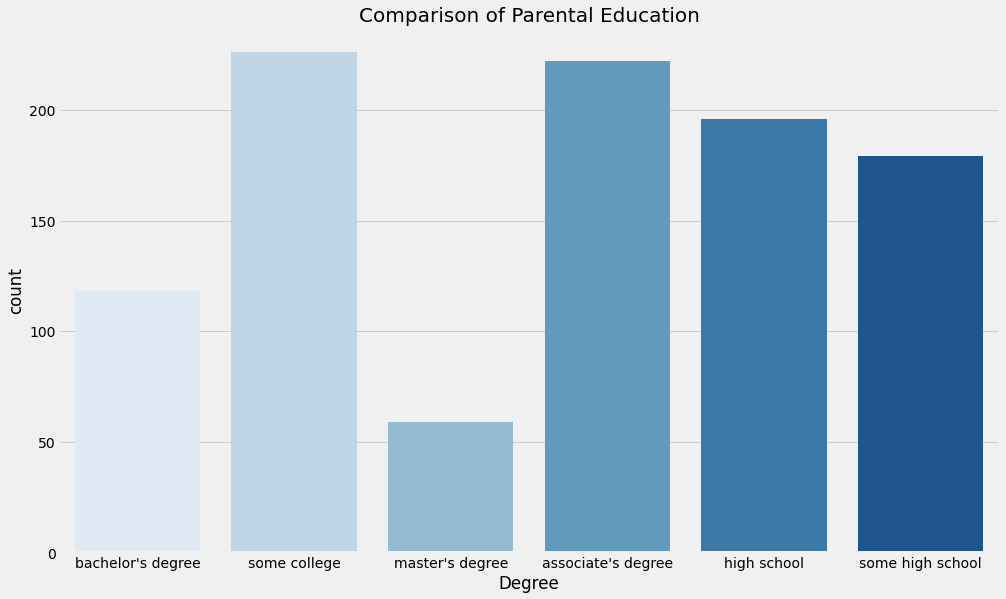

In [28]:
# What is educational background of student's parent ? 

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x = data['parental level of education'], data = data, palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights

Largest number of parents are from some college.

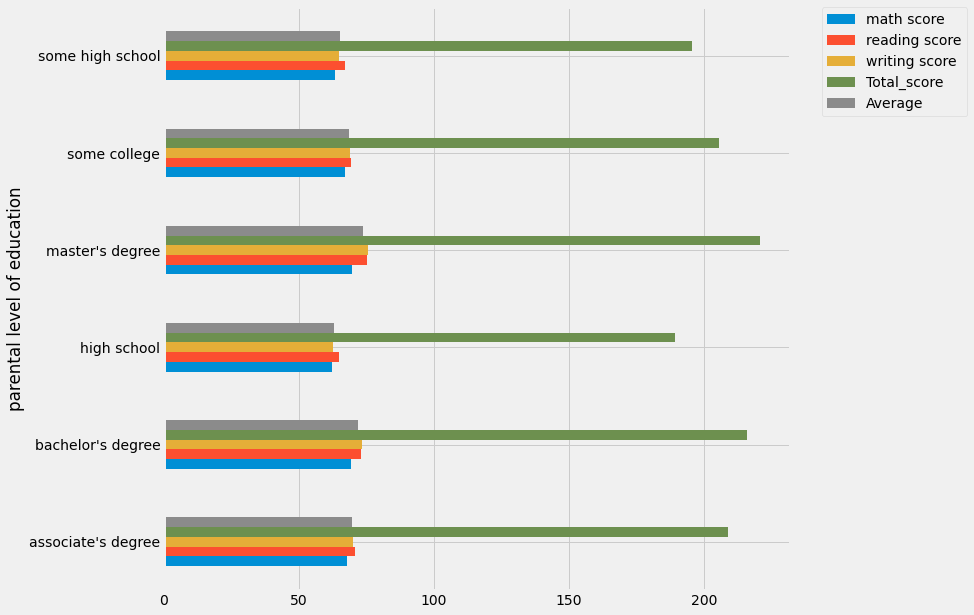

In [29]:
parental_group.plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insights

The score of student whose parents possess master and bachelor level education are higher than others.

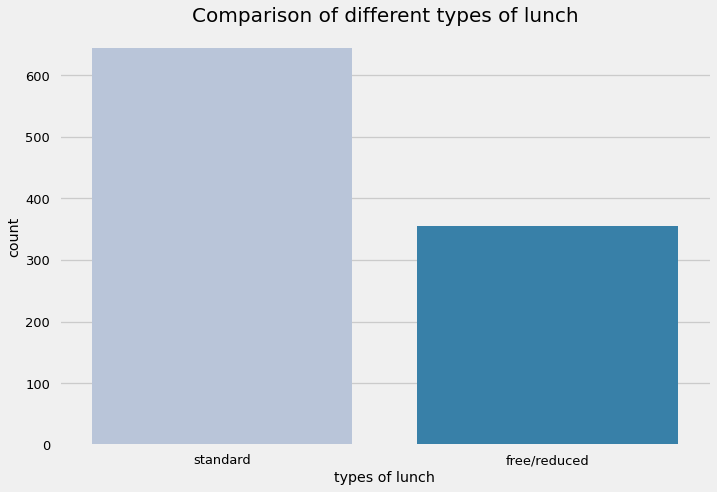

In [30]:
# Lunch 

#  Which type of lunch is most common amoung students ?

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x = data['lunch'],data = data, palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights

Students being served Standard lunch was more than free lunch

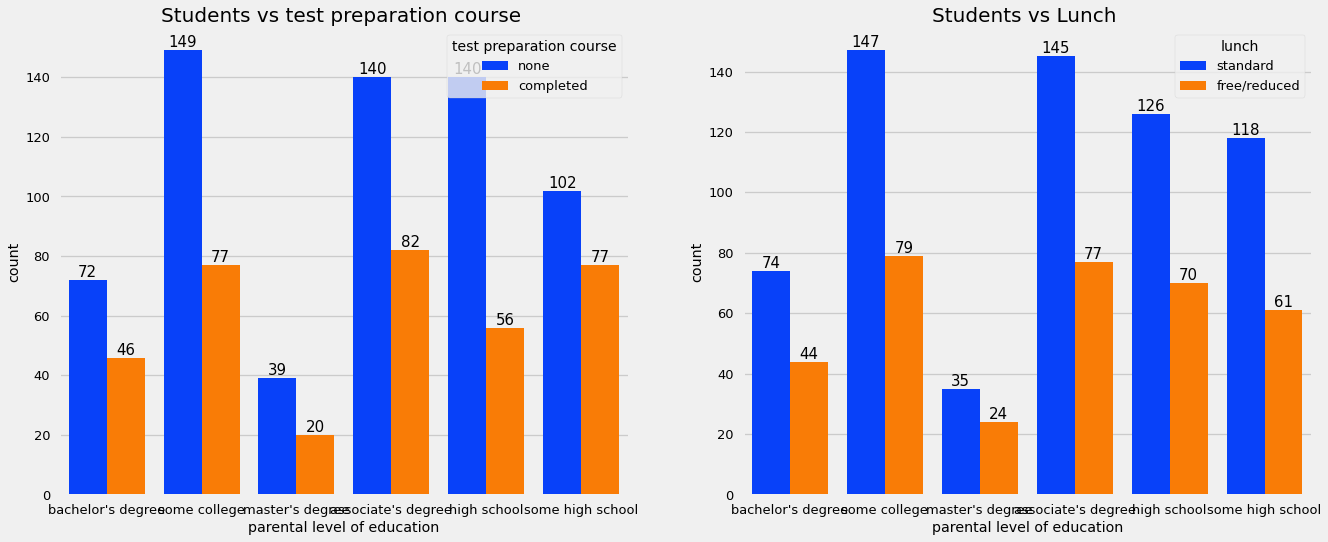

In [31]:
# Is lunch type intake has any impact on student's performance ?

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=data['parental level of education'],data=data,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
sns.countplot(x=data['parental level of education'],data=data,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
ax[1].set_title('Students vs Lunch ',color='black',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)   

<AxesSubplot:xlabel='lunch', ylabel='writing score'>

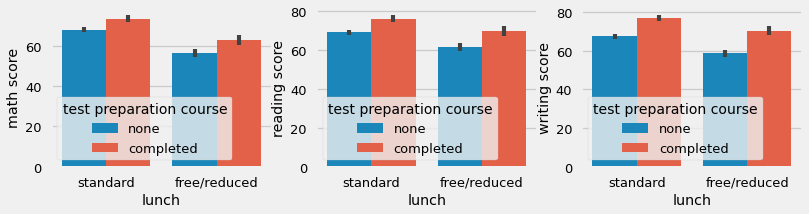

In [33]:
# TEST PREPARATION COURSE COLUMN

# Is Test prepration course has any impact on student's performance ? 

plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
sns.barplot (x=data['lunch'], y=data['math score'], hue=data['test preparation course'])
plt.subplot(2,3,2)
sns.barplot (x=data['lunch'], y=data['reading score'], hue=data['test preparation course'])
plt.subplot(2,3,3)
sns.barplot (x=data['lunch'], y=data['writing score'], hue=data['test preparation course'])

Insights

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

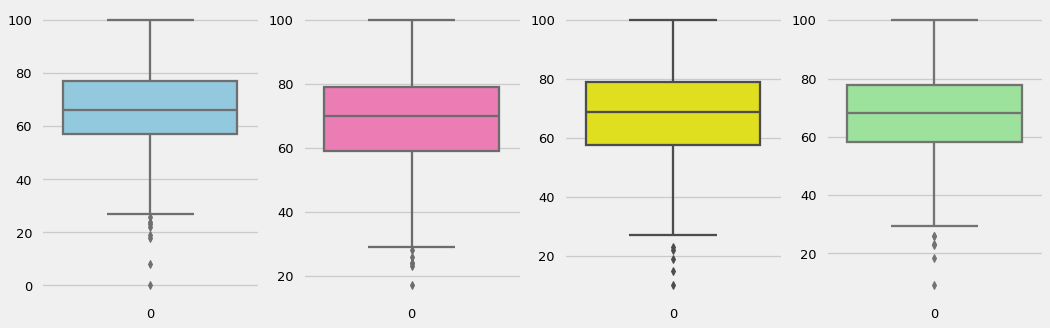

In [36]:
# Chekcing Outliers 

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['Average'],color='lightgreen')
plt.show()

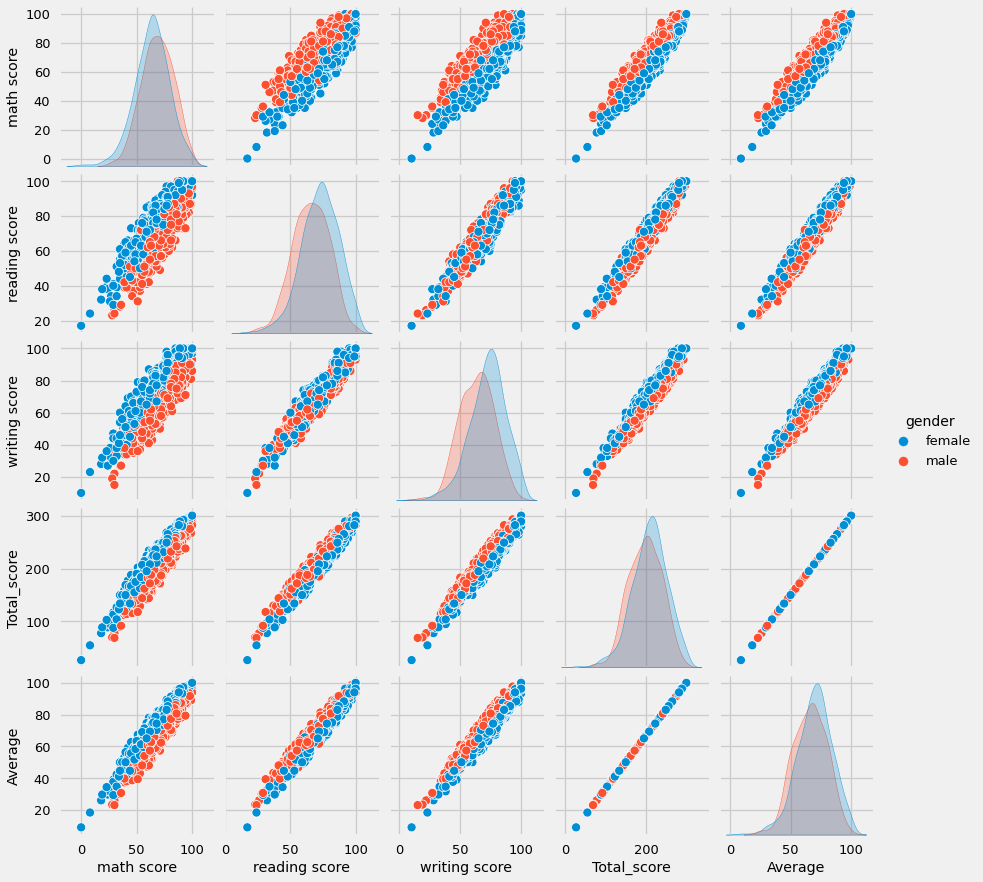

In [38]:
sns.pairplot(data,hue = 'gender')
plt.show()

Insights

From the above plot it is clear that all the scores increase linearly with each other.

5. Conclusions

Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitial.